In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import plotly.express as px
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib
import math

Load data

In [3]:
df = pd.read_csv("prepared_data_cont.csv", encoding="utf-8", index_col=0)

Count concerts in every city

In [4]:
df_cities = df.groupby(["City", "Country"])["Venue"].count().reset_index()
df_cities = df_cities.rename(columns={"Venue" : "Count"})
df_cities = df_cities.merge(df, how="outer", on=["City", "Country"])[["City", "Country", "Count", "Latitude", "Longitude", "Continent"]].drop_duplicates().reset_index(drop=True)
df_cities = df_cities.sort_values("Count") 
# visualization of sorted data is more readable, because more important (with bigger count value) datapoints will be on the top of plot

I will use this column to determine scatter size in plotly scattermapbox, because if `Count==1` then marker is very small in compare to the others

In [5]:
df_cities["Disp_size"] = df_cities["Count"].apply(lambda x : max(x, 10)) 

# What does 'world' in 'world tour' means?

Introduction

Inital statistics

In [6]:
len(df)

7281

In [7]:
df.value_counts("Tour title").count()

49

In [8]:
df["Country"].nunique()

79

In [9]:
df["City"].nunique()

604

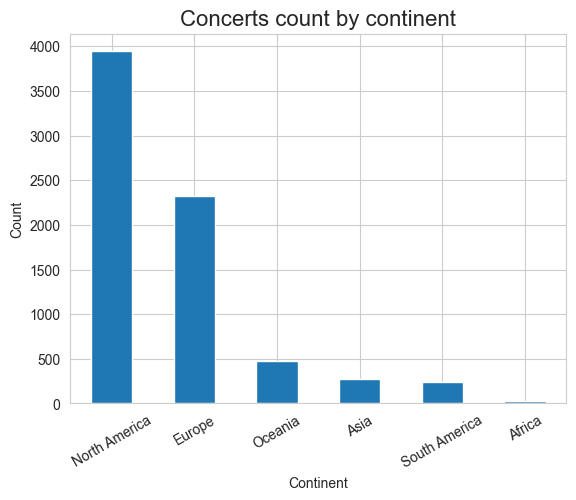

In [10]:
with sns.axes_style("whitegrid", {"grid.color": ".8"}):
    df["Continent"].value_counts().plot(kind="bar")
    plt.xticks(rotation=30)
    plt.title("Concerts count by continent", size=16)
    plt.ylabel("Count")
    plt.show()

Count concerts in Africa

In [16]:
print(len(df[df["Continent"]=="Africa"]))
print(f'{(len(df[df["Continent"]=="Africa"]) / len(df)):.3%}')

29
0.398%


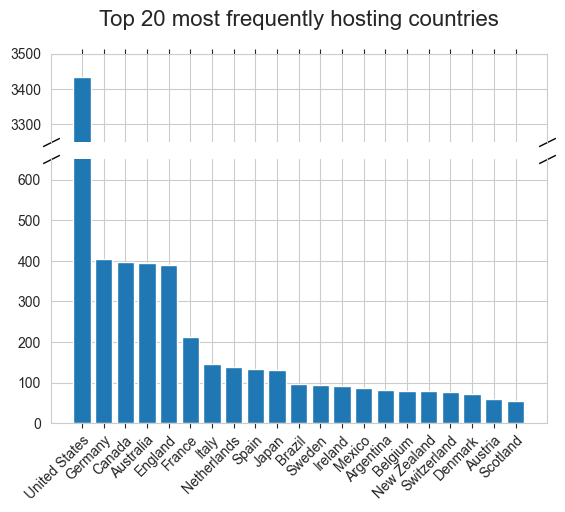

In [11]:
with sns.axes_style("whitegrid", {"grid.color": ".8"}):

    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 3]})
    fig.subplots_adjust(hspace=0.1)  # adjust space between axes


    ax1.bar(x = df["Country"].value_counts().index[:21], height = df["Country"].value_counts().iloc[:21])
    ax2.bar(x = df["Country"].value_counts().index[:21], height = df["Country"].value_counts().iloc[:21])

    # zoom-in / limit the view to different portions of the data
    ax1.set_ylim(3250, 3500)  # outliers only
    ax2.set_ylim(0, 650)  # most of the data

    # hide the spines between ax and ax2
    ax1.spines.bottom.set_visible(False)
    ax2.spines.top.set_visible(False)
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop=False)  # don't put tick labels at the top
    ax2.xaxis.tick_bottom()
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

    kwargs = dict(marker=[(-1, -0.5), (1, 0.5)], markersize=12,
                linestyle="none", color='k', mec='k', mew=1, clip_on=False)

    ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

    ax1.set_title("Top 20 most frequently hosting countries", size=16, pad=20)

    plt.show()

Iterate over all continents

In [43]:
continents = df["Continent"].unique()

| Country            |   count |
|:-------------------|--------:|
| United States      |    3435 |
| Canada             |     398 |
| Mexico             |      88 |
| Costa Rica         |       8 |
| Puerto Rico        |       6 |
| Dominican Republic |       3 |
| Guatemala          |       2 |
| Panama             |       1 |
| El Salvador        |       1 |
| Honduras           |       1 |
| Country                |   count |
|:-----------------------|--------:|
| Germany                |     405 |
| England                |     390 |
| France                 |     212 |
| Italy                  |     146 |
| Netherlands            |     139 |
| Spain                  |     133 |
| Sweden                 |      95 |
| Ireland                |      92 |
| Belgium                |      80 |
| Switzerland            |      77 |
| Denmark                |      71 |
| Austria                |      60 |
| Scotland               |      54 |
| Norway                 |      51 |
| Poland    

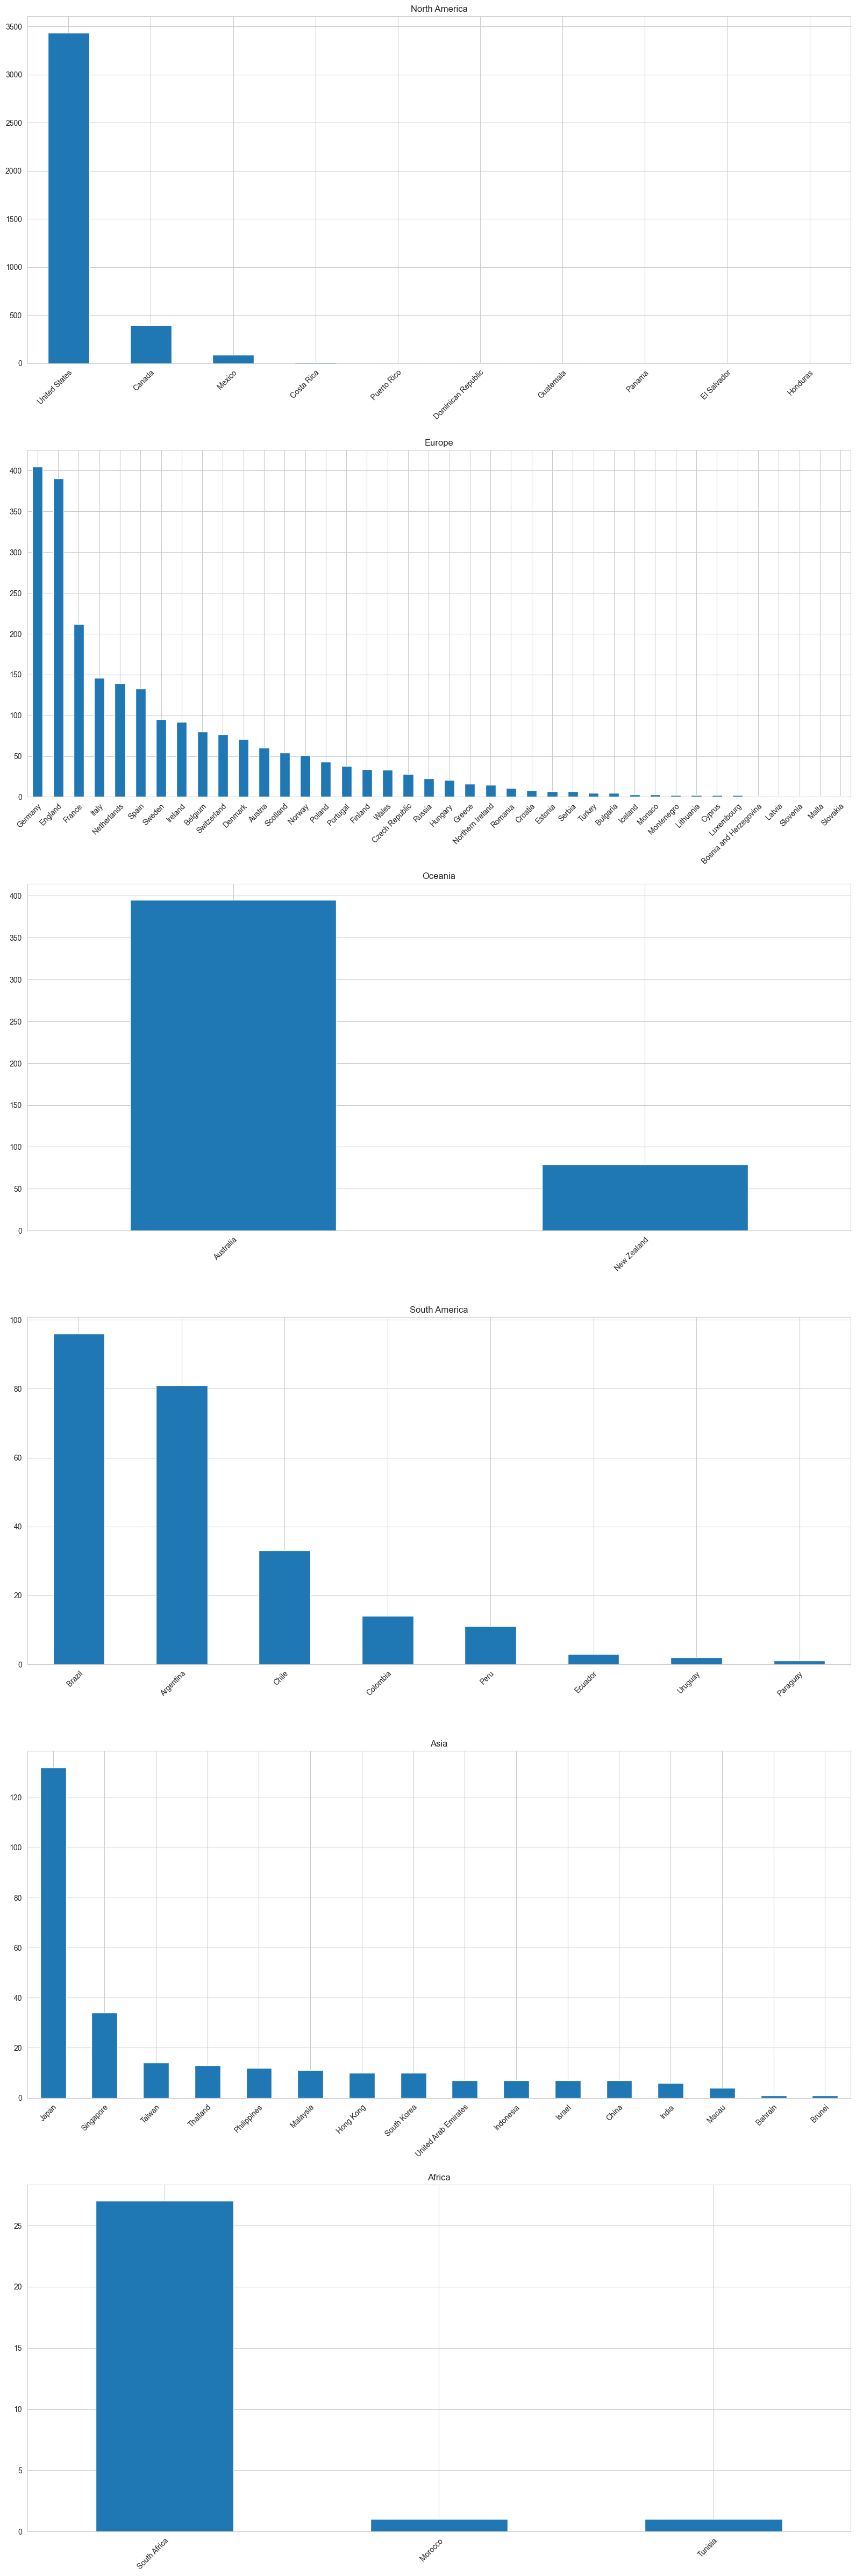

In [45]:
with sns.axes_style("whitegrid", {"grid.color": ".8"}):
    fig, axs= plt.subplots(6,1, figsize=(16,48))

    axs = axs.flatten()
    for i, c in enumerate(continents):
        print(df[df["Continent"] == c]["Country"].value_counts().to_markdown())
        axs[i] = df[df["Continent"] == c]["Country"].value_counts().plot(kind="bar", ax=axs[i])
        plt.setp(axs[i].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        axs[i].set_title(c)
        axs[i].set_xlabel("")

    fig.tight_layout(pad=1.0)
    plt.show()

In [41]:
df[df["Country"].isin(df[df["Continent"] == "North America"]["Country"]) & ~df["Country"].isin(['United States', 'Mexico', 'Canada'])]

Country            City                           Venue  \
522          Puerto Rico        San Juan          Coliseo de Puerto Rico   
523           Costa Rica        Alajuela          Coca-Cola Amphitheater   
851           Costa Rica        San Jose  Estadio Nacional de Costa Rica   
852           Costa Rica        San Jose  Estadio Nacional de Costa Rica   
853   Dominican Republic   Santo Domingo  Estadio Olímpico Félix Sánchez   
1232          Costa Rica        San Jose  Estadio Nacional de Costa Rica   
1475         Puerto Rico        San Juan          Coliseo de Puerto Rico   
2089         Puerto Rico        San Juan    José Miguel Agrelot Coliseum   
2149         Puerto Rico        San Juan          Coliseo de Puerto Rico   
2152           Guatemala  Guatemala City       Estadio Cementos Progreso   
2153          Costa Rica        San Jose                Estadio Nacional   
2978          Costa Rica        San Jose  Estadio Nacional de Costa Rica   
5525         Puerto Rico        San Juan          Coliseo de Puerto Rico   
5829         Puerto Rico        San Juan          Coliseo de Puerto Rico   
6292  Dominican Republic   Santo Domingo  Estadio Olímpico Félix Sánchez   
6293  Dominican Republic   Santo Domingo  Estadio Olímpico Félix Sánchez   
6305              Panama     Panama City        Estadio Rommel Fernández   
6306          Costa Rica        San Jose  Estadio Nacional de Costa Rica   
6307         El Salvador    San Salvador               Estadio Cuscatlán   
6308            Honduras  San Pedro Sula  Estadio Olímpico Metropolitano   
6309           Guatemala  Guatemala City    Explanada Cardales de Cayalá   
6550          Costa Rica        San Jose                Estadio Nacional   

                   Date                 Artist  \
522         4 June 2017             Ed Sheeran   
523         6 June 2017             Ed Sheeran   
851            18 March               Coldplay   
852            19 March               Coldplay   
853            22 March               Coldplay   
1232  November 26, 2016          Guns N' Roses   
1475   11 February 2006     The Rolling Stones   
2089   21 November 2009                  AC/DC   
2149   October 26, 2016              Metallica   
2152   November 3, 2016              Metallica   
2153   November 5, 2016              Metallica   
2978   December 7, 2017             Bruno Mars   
5525   11 December 2007             The Police   
5829    31 January 2009            Celine Dion   
6292   October 21, 2022              Bad Bunny   
6293   October 22, 2022              Bad Bunny   
6305  November 22, 2022              Bad Bunny   
6306  November 24, 2022              Bad Bunny   
6307  November 26, 2022              Bad Bunny   
6308  November 29, 2022              Bad Bunny   
6309   December 1, 2022              Bad Bunny   
6550   October 31, 2023  Red Hot Chili Peppers   

                             Tour title   Latitude  Longitude      Continent  
522                              ÷ Tour  18.465299 -66.116666  North America  
523                              ÷ Tour  10.452332 -84.466328  North America  
851   Music of the Spheres World Tour †   9.932543 -84.079578  North America  
852   Music of the Spheres World Tour †   9.932543 -84.079578  North America  
853   Music of the Spheres World Tour †  18.480197 -69.942111  North America  
1232       Not in This Lifetime... Tour   9.932543 -84.079578  North America  
1475                 A Bigger Bang Tour  18.465299 -66.116666  North America  
2089               Black Ice World Tour  18.465299 -66.116666  North America  
2149                    WorldWired Tour  18.465299 -66.116666  North America  
2152                    WorldWired Tour  14.642467 -90.513136  North America  
2153                    WorldWired Tour   9.932543 -84.079578  North America  
2978               24K Magic World Tour   9.932543 -84.079578  North America  
5525            The Police Reunion Tour  18.465299 -66.116666  North America  
5829       

In [9]:
df.groupby("Tour title")["Continent"].nunique().sort_values(ascending=False).value_counts()

Continent
5    16
4    14
3     7
2     7
6     4
1     1
Name: count, dtype: int64

In [10]:
print(df.groupby("Tour title")["Continent"].nunique().sort_values(ascending=False))

Tour title
PopMart Tour                               6
Not in This Lifetime... Tour               6
24K Magic World Tour                       6
÷ Tour                                     6
HIStory World Tour                         5
Global Stadium Tour †                      5
A Bigger Bang Tour                         5
A Head Full of Dreams Tour                 5
The Eras Tour †                            5
Music of the Spheres World Tour †          5
The Joshua Tree Tours 2017 and 2019        5
Love On Tour                               5
The Police Reunion Tour                    5
Taking Chances World Tour                  5
U2 360° Tour                               5
Vertigo Tour                               5
Wildest Dreams Tour                        5
Break Every Rule World Tour                5
WorldWired Tour                            5
Black Ice World Tour                       5
Sticky & Sweet Tour                        4
The Wall Live                              4

In [11]:
tour_titles_on_all_continents = list(df.groupby("Tour title")["Continent"].nunique()[df.groupby("Tour title")["Continent"].nunique() == 6].index)
df[df["Tour title"].isin(tour_titles_on_all_continents)][["Tour title", "Artist"]].drop_duplicates()

Tour title         Artist
481                         ÷ Tour     Ed Sheeran
1188  Not in This Lifetime... Tour  Guns N' Roses
2867          24K Magic World Tour     Bruno Mars
4508                  PopMart Tour             U2

<Axes: >

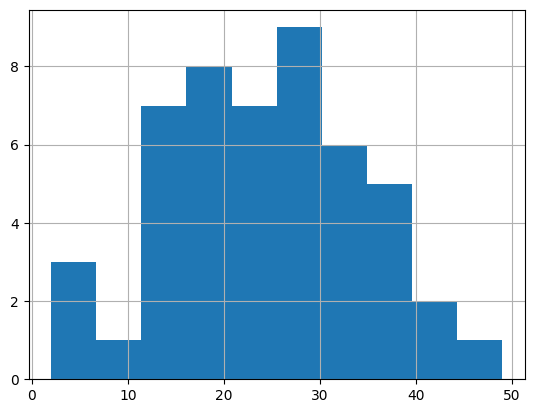

In [12]:
df.groupby("Tour title")["Country"].nunique().sort_values(ascending=False).hist()

In [13]:
df.groupby("Tour title")["Country"].nunique().sort_values(ascending=False).head()

Tour title
÷ Tour                               49
Not in This Lifetime... Tour         42
24K Magic World Tour                 40
Music of the Spheres World Tour †    39
WorldWired Tour                      39
Name: Country, dtype: int64

In [14]:
df.groupby("Tour title")["Country"].nunique().sort_values(ascending=False).tail()

Tour title
Renaissance World Tour                     12
Born in the U.S.A. Tour                    11
Victory Tour                                5
The Garth Brooks World Tour                 5
The Garth Brooks World Tour (2014–2017)     2
Name: Country, dtype: int64

Jak to wygląda na mapie?

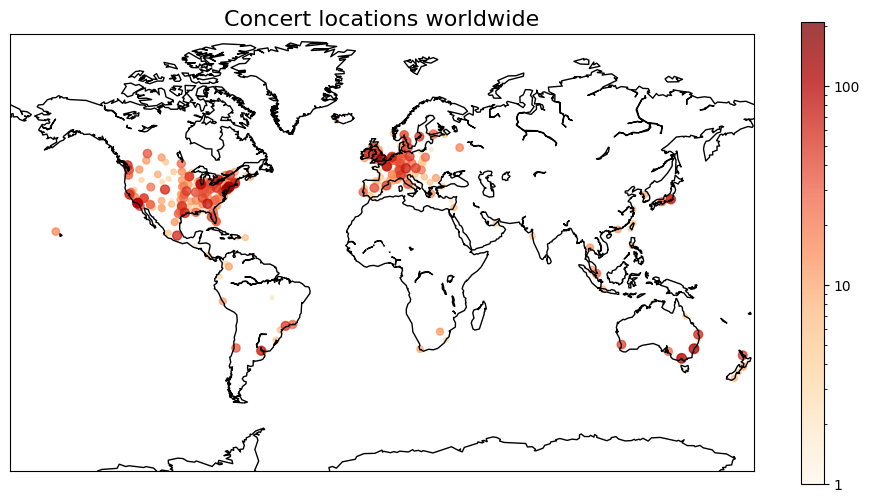

In [48]:
fig = plt.figure(figsize=(12,6))

map = Basemap( projection="mill",
              llcrnrlat=-75, llcrnrlon=-180,
              urcrnrlat=85, urcrnrlon=180,
              lat_0=0, lon_0=0)
map.drawcoastlines()

map.scatter(df_cities["Longitude"], 
            df_cities["Latitude"], 
            latlon=True, 
            c=df_cities['Count'], 
            s=(df_cities['Count'].apply(lambda x: math.log(x))) * 10, 
            alpha=0.75, 
            cmap='OrRd', 
            norm=matplotlib.colors.LogNorm()
)

cbar = plt.colorbar()
cbar = cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
plt.title("Concert locations worldwide", size=16)
plt.show()

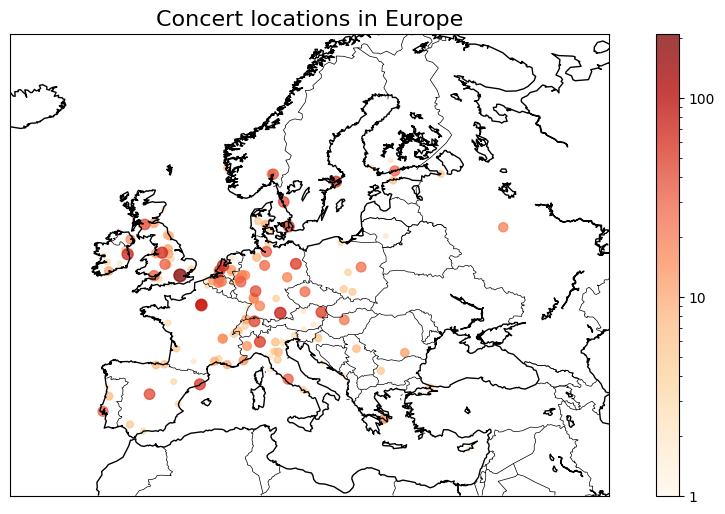

In [53]:
df_europa = df_cities[df_cities["Continent"]=="Europe"]

fig = plt.figure(figsize=(12,6))

map = Basemap( projection="mill",
              llcrnrlat=30, llcrnrlon=-20,
              urcrnrlat=70, urcrnrlon=50,
              resolution="l",
              lat_0=0, lon_0=0)
map.drawcoastlines()
map.drawcountries()

map.scatter(df_europa["Longitude"], 
            df_europa["Latitude"], 
            latlon=True, 
            c=df_europa['Count'], 
            s=(df_europa['Count'].apply(lambda x: math.log(x))) * 15, 
            alpha=0.75, 
            cmap='OrRd', 
            norm=matplotlib.colors.LogNorm()
)

cbar = plt.colorbar()
cbar = cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
plt.title("Concert locations in Europe", size=16)
plt.show()

In [30]:
fig = px.density_mapbox(df_cities, 
                        lat='Latitude', 
                        lon='Longitude', 
                        z='Disp_size', 
                        radius=30, 
                        hover_data={'Latitude': False, 'Longitude': False, "Count": True, "City":True},
                        center=dict(lat=0, lon=0), 
                        zoom=1,
                        mapbox_style = 'open-street-map')

fig.update_layout(
    autosize=False,
    width=1200,
    height=800,
)

fig.show(renderer="notebook")

In [28]:
fig = px.scatter_mapbox(df_cities, 
                        lat='Latitude', 
                        lon='Longitude', 
                        hover_data={
                            'Latitude': False, 
                            'Longitude': False, 
                            'Count': True, 
                            'City':True, 
                            'Country': True, 
                            'Disp_size':False
                        },
                        center=dict(lat=0, lon=0), 
                        size='Disp_size',
                        zoom=1,
                        mapbox_style = 'carto-darkmatter',
                        color='Count',
                        color_continuous_scale='orrd')

fig.update_layout(
    autosize=False,
    width=1200,
    height=800,
)

fig.show(renderer="notebook")

In [58]:
df["City"].value_counts().head(10)

City
London             213
New York City      140
Sydney             120
Los Angeles        115
Toronto            114
Philadelphia       112
Melbourne          108
East Rutherford    104
Chicago             99
Paris               84
Name: count, dtype: int64